In [76]:
import pandas as pd
import numpy as np
import sqlite3
from sqlalchemy import create_engine
import csv

In [77]:
from platform import python_version

print(python_version())

3.9.12


In [78]:
"""
def convert_dtype(x):
    if not x:
        return ''
    try:
        return str(x)   
    except:        
        return ''
    
df_firstn = pd.read_csv('Cross Selling\Train.csv', converters={5: convert_dtype,8: convert_dtype,11: convert_dtype,15: convert_dtype})
df_firstn.head()
"""

#df_firstn = pd.read_csv('Cross Selling\Train.csv', low_memory=False,)
#df_firstn
df_firstn = pd.read_csv('train.csv', nrows=80000)

In [79]:
#worked on 80000 rows due to the large number of data
print(df_firstn)

       fecha_dato  ncodpers ind_empleado pais_residencia sexo  age  \
0      2015-01-28   1375586            N              ES    H   35   
1      2015-01-28   1050611            N              ES    V   23   
2      2015-01-28   1050612            N              ES    V   23   
3      2015-01-28   1050613            N              ES    H   22   
4      2015-01-28   1050614            N              ES    V   23   
...           ...       ...          ...             ...  ...  ...   
79995  2015-01-28    932921            N              ES    V   28   
79996  2015-01-28    932922            N              ES    V   40   
79997  2015-01-28    932923            N              ES    V   26   
79998  2015-01-28    932926            N              ES    V   27   
79999  2015-01-28    932927            N              ES    H   24   

       fecha_alta  ind_nuevo antiguedad  indrel ult_fec_cli_1t  indrel_1mes  \
0      2015-01-12        0.0          6     1.0            NaN          1.0   
1

In [80]:
df_firstn.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1.0,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,N,NaN,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [81]:
df_firstn.columns
    

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

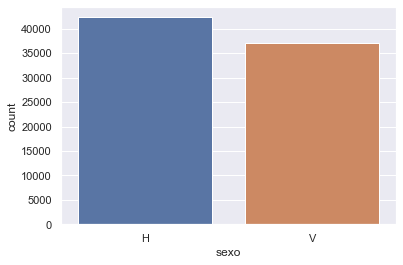

In [82]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="sexo", data=df_firstn)

In [11]:
csv_database = create_engine('sqlite:///csv_database.db')

In [ ]:
df = pd.read_sql_query('select * FROM data_use WHERE ncodpers=1050611 \
     AND ind_nuevo=1 AND age=23', csv_database)
df = pd.read_sql_query('select * FROM data_use', csv_database)

In [13]:
df.columns
df

,index,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1


In [16]:
data=pd.read_csv('Test.csv', low_memory=False)

In [17]:
data.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento
0,2016-06-28,15889,F,ES,V,56,1995-01-16,0,256,1,...,N,N,KAT,N,1,28.0,MADRID,1,326124.90,01 - TOP
1,2016-06-28,1170544,N,ES,H,36,2013-08-28,0,34,1,...,N,NaN,KAT,N,1,3.0,ALICANTE,0,NA,02 - PARTICULARES
2,2016-06-28,1170545,N,ES,V,22,2013-08-28,0,34,1,...,N,NaN,KHE,N,1,15.0,"CORUÑA, A",1,NA,03 - UNIVERSITARIO
3,2016-06-28,1170547,N,ES,H,22,2013-08-28,0,34,1,...,N,NaN,KHE,N,1,8.0,BARCELONA,0,148402.98,03 - UNIVERSITARIO
4,2016-06-28,1170548,N,ES,H,22,2013-08-28,0,34,1,...,N,NaN,KHE,N,1,7.0,"BALEARS, ILLES",0,106885.80,03 - UNIVERSITARIO


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks")

sns.pairplot(df_firstn['ind_nuevo', 'antiguedad', 'age', 'sexo', 'ind_empleado', 'antiguedad', 'indrel', 'indrel_1mes', 'indresi', 'conyuemp', 'renta', 'segmento', 'ind_ahor_fin_ult1', 'ind_cco_fin_ult1', 'ind_cno_fin_ult1', 'ind_dela_fin_ult1', 'ind_hip_fin_ult1', 'ind_pres_fin_ult1', 'ind_nomina_ult1'], hue="segmento")

In [86]:
pd.set_option("display.max_columns", None)

In [25]:
df_firstn.shape[0]

80000

In [90]:
len(df_firstn.sexo.unique())

3

In [95]:
df_firstn.rename(columns={'ncodpers': 'customer_code', 
                         'ind_empleado': 'employee_ind',
                         'pais_residencia': 'cust_country_residence',
                         'sexo': 'sex',
                         'ind_nuevo': 'new_cust_index',
                         'antiguedad': 'customer_seniority',
                         'indresi': 'residence_ind',
                         'indext': 'foreigner_ind',
                         'conyuemp': 'spouse_index',
                         'canal_entrada': 'channel',
                         'indfall': 'deceased_ind',
                         'tipodom': 'addres_type',
                         'nomprov': 'province_name',
                         'ind_actividad_cliente': 'activity_index',
                         'renta': 'income',
                         'segmento': 'segment',
                         'ind_ahor_fin_ult1': 'Saving_Account',
                         'ind_aval_fin_ult1': 'Guarantees',
                         'ind_cco_fin_ult1': 'Current_Accounts',
                         'ind_cder_fin_ult1': 'Derivada_Account',
                         'ind_cno_fin_ult1': 'Payroll_Account',
                         'ind_ctju_fin_ult1': 'Junior_Account',
                         'ind_ctma_fin_ult1': 'Más_particular_Account',
                         'ind_ctop_fin_ult1': 'Particular_Account',
                         'ind_ctpp_fin_ult1': 'Particular_Plus_Account',
                         'ind_deco_fin_ult1': 'Short_term_deposits',
                         'ind_deme_fin_ult1': 'Medium_term_deposits',
                         'ind_dela_fin_ult1': 'Long_term_deposits',
                         'ind_ecue_fin_ult1': 'e_account',
                         'ind_fond_fin_ult1': 'Funds',
                         'ind_hip_fin_ult1': 'Mortgage',
                         'ind_plan_fin_ult1': 'Pensions',
                         'ind_pres_fin_ult1': 'Loans',
                         'ind_reca_fin_ult1': 'Taxes',
                         'ind_tjcr_fin_ult1': 'Credit_Card',
                         'ind_valo_fin_ult1': 'Securities',
                         'ind_viv_fin_ult1': 'Home_Account',
                         'ind_nomina_ult1': 'Payroll',
                         'ind_nom_pens_ult1': 'Pensions_2',
                         'ind_recibo_ult1': 'Direct_Debit'}, inplace=True)

In [96]:
products = ['Saving_Account', 'Guarantees',
       'Current_Accounts', 'Derivada_Account', 'Payroll_Account',
       'Junior_Account', 'Más_particular_Account', 'Particular_Account',
       'Particular_Plus_Account', 'Short_term_deposits',
       'Medium_term_deposits', 'Long_term_deposits', 'e_account', 'Funds',
       'Mortgage', 'Pensions', 'Loans', 'Taxes', 'Credit_Card', 'Securities',
       'Home_Account', 'Payroll', 'Pensions_2', 'Direct_Debit']

In [97]:
df_firstn['total_products'] = df_firstn[products].sum(axis=1)

In [98]:
for prod in products:
    num_cl = df_firstn['customer_code'][df_firstn[prod] == 1].nunique()
    per_cl = df_firstn['customer_code'][df_firstn[prod] == 1].nunique() / df_firstn['customer_code'].nunique() * 100
    print(f'Number of clients who have {prod} = {num_cl} or {round(per_cl, 5)}% of all customers')

Number of clients who have Saving_Account = 0 or 0.0% of all customers
Number of clients who have Guarantees = 0 or 0.0% of all customers
Number of clients who have Current_Accounts = 72027 or 90.03375% of all customers
Number of clients who have Derivada_Account = 3 or 0.00375% of all customers
Number of clients who have Payroll_Account = 4506 or 5.6325% of all customers
Number of clients who have Junior_Account = 822 or 1.0275% of all customers
Number of clients who have Más_particular_Account = 189 or 0.23625% of all customers
Number of clients who have Particular_Account = 0 or 0.0% of all customers
Number of clients who have Particular_Plus_Account = 1 or 0.00125% of all customers
Number of clients who have Short_term_deposits = 18 or 0.0225% of all customers
Number of clients who have Medium_term_deposits = 28 or 0.035% of all customers
Number of clients who have Long_term_deposits = 1845 or 2.30625% of all customers
Number of clients who have e_account = 6584 or 8.23% of all cus

In [32]:
total_prod_by_cust = df_firstn.groupby('customer_code')[products].sum()

In [33]:
for prod in products:
    total_prod_by_cust[prod] = total_prod_by_cust[prod].apply(lambda x: 1 if x > 0 else 0)

In [34]:
total_prod_by_cust['total_products'] = total_prod_by_cust.sum(axis=1)

In [36]:
#delete customers without any products
total_prod_by_cust = total_prod_by_cust.drop(total_prod_by_cust[total_prod_by_cust.total_products == 0].index)
df_firstn = df_firstn.drop(df_firstn[df_firstn.total_products == 0].index)

Text(0.5, 1.0, 'Products distribution')

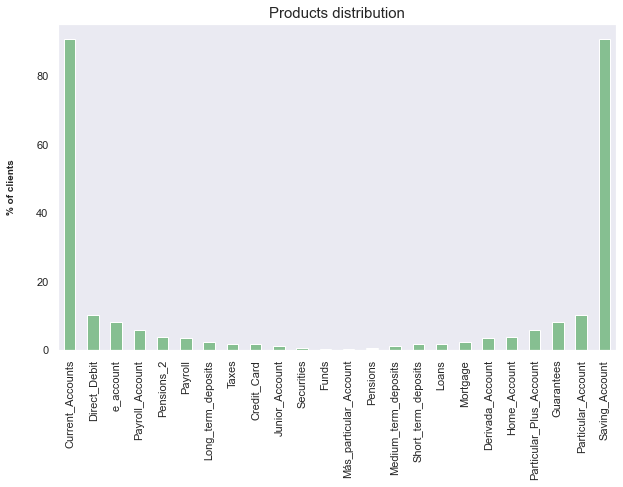

In [100]:
data = total_prod_by_cust[products].sum().sort_values(ascending=True) / total_prod_by_cust.shape[0] * 100 #).plot(kind='bar').set_title('Products distribution')

ax = data.plot(kind='bar', grid=False, figsize=(10,6), color='#86bf91', zorder=2)
ax.set_ylabel("% of clients", labelpad=20, weight='bold', size=10)
ax.set_title("Products distribution", size=15)

data = total_prod_by_cust[products].sum().sort_values(ascending=False) / total_prod_by_cust.shape[0] * 100 #).plot(kind='bar').set_title('Products distribution')

ax = data.plot(kind='bar', grid=False, figsize=(10,6), color='#86bf91', zorder=2)
ax.set_ylabel("% of clients", labelpad=20, weight='bold', size=10)
ax.set_title("Products distribution", size=15)

In [43]:
dict_products = {'Credit_Card': 58615,
                'Current_Accounts': 619653,
                'Direct_Debit': 156755,
                'Funds': 17294,
                'Long_term_deposits': 47251,
                'Más_particular_Account': 17544,
                'Particular_Account': 107642,
                'Particular_Plus_Account': 37032,
                'Payroll': 70257,
                'Payroll_Account': 85061,
                'Pensions_2': 75400,
                'Securities': 24029,
                'Taxes': 45894,
                'e_account': 81384,
                 'other': 36156}

<AxesSubplot:>

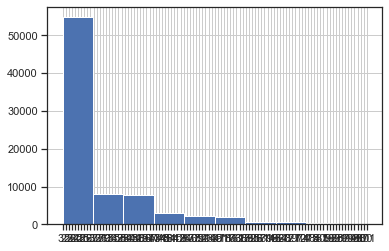

In [44]:
df_firstn.age.hist()

In [52]:
def func_ages_group(x):
    if x == 15:
        return "<16"
    elif x == 16 and x <= 30:
        return "21-40"
    elif x == 31 and x <= 55:
        return "31-55"
    else:
        return ">55"


df_firstn['age_group']  = df_firstn['age'].apply(func_ages_group)

In [54]:
total_prod_by_cust = total_prod_by_cust.reset_index(level=0)

In [55]:
total_prod_by_cust = total_prod_by_cust.merge(df_firstn[['customer_code','age_group']], on='customer_code')

In [56]:
total_prod_by_cust.drop_duplicates(inplace=True)

In [57]:
def pie_plot(data, figsize, title, fontsize):

    pie, ax = plt.subplots(figsize=figsize)
    labels = data.keys()
    plt.pie(x=data, autopct="%.1f%%", labels=list(labels), pctdistance=0.5)
    plt.title(title, fontsize=fontsize)
    # pie.savefig("Total_users.png")

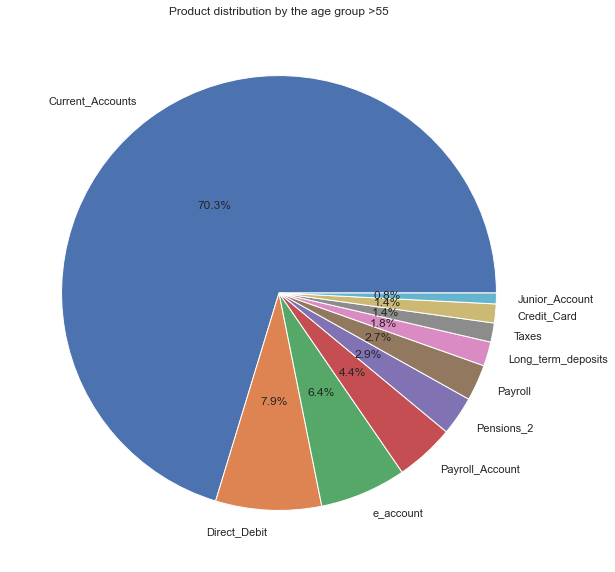

In [59]:
age_groups = total_prod_by_cust.age_group.unique()
for gr in age_groups:
    data = total_prod_by_cust[products][total_prod_by_cust.age_group == gr].sum().sort_values(ascending=False).head(10)
    pie_plot(data, [15,10], f'Product distribution by the age group {gr}', 12)

In [60]:
def func_segment_group(x):
    if x <= 50000:
        return "income less 50 000"
    elif x > 50000 and x <= 300000:
        return "income 50 000 - 300 000"
    elif x > 300000 and x <= 500000:
        return "income 300 000 - 500 000"
    else:
        return "income more than 500 000"


df_firstn['income_group']  = df_firstn['income'].apply(func_segment_group)

In [61]:
df_for_merge = df_firstn[['customer_code','income_group']].drop_duplicates()

In [62]:
total_prod_by_cust = total_prod_by_cust.merge(df_for_merge, on='customer_code')

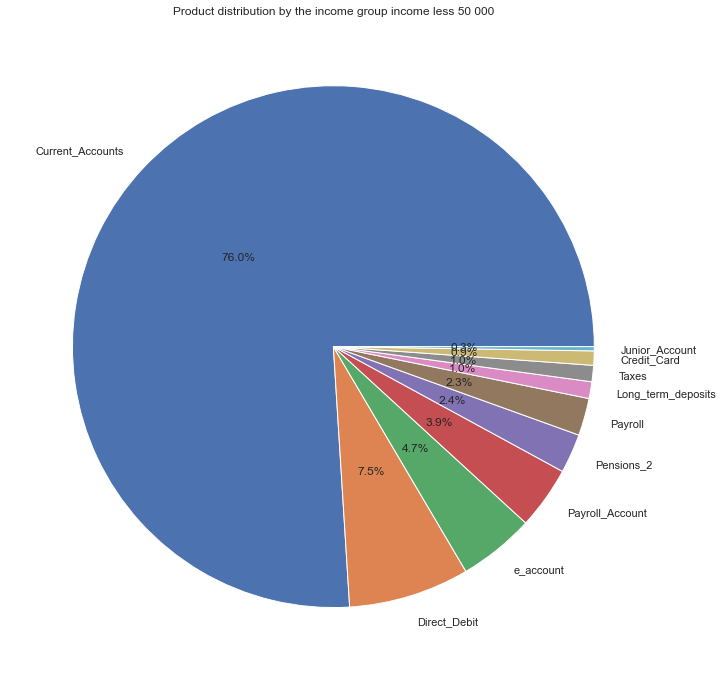

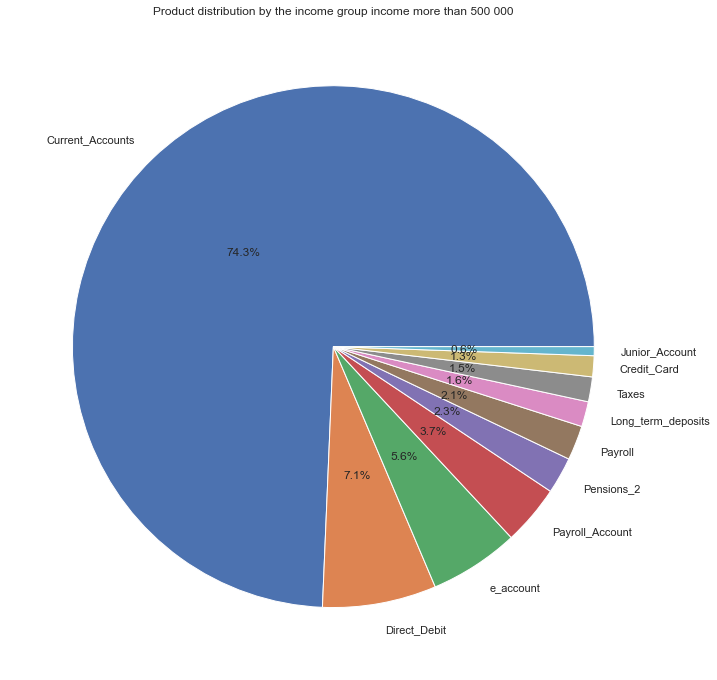

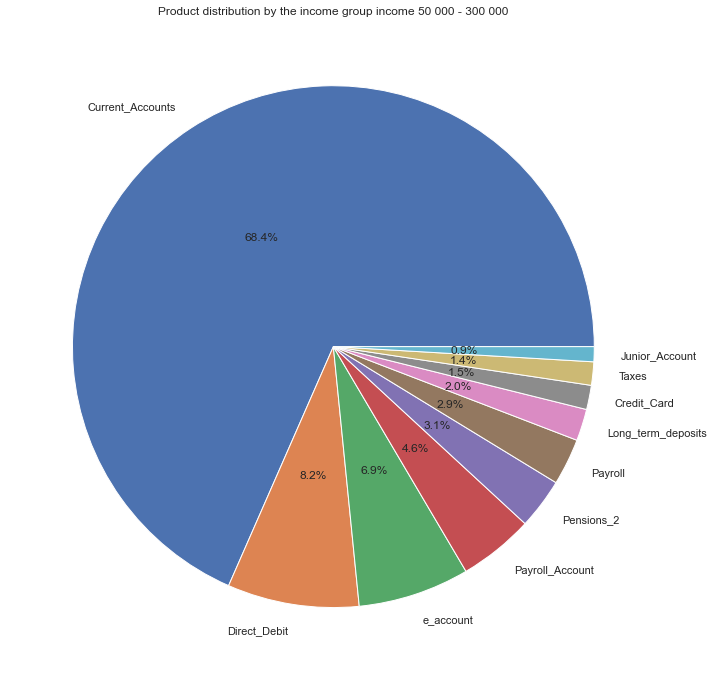

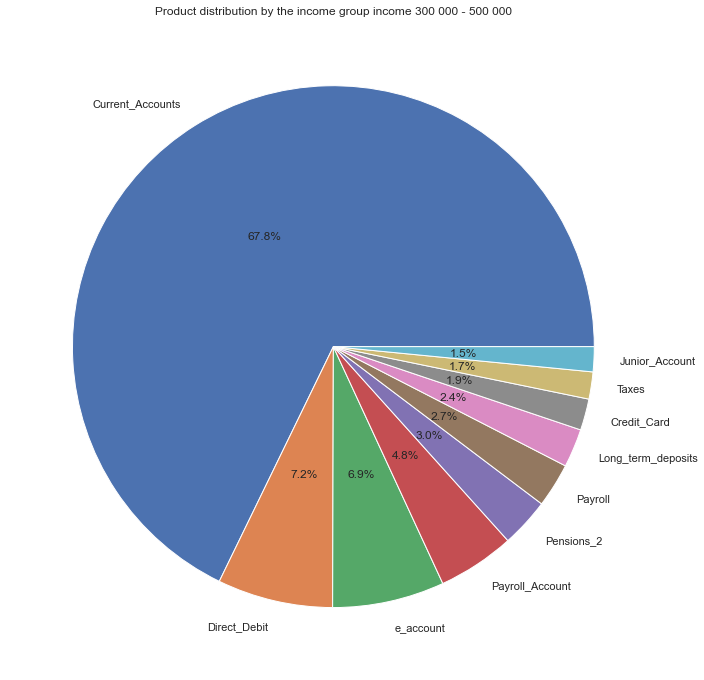

In [63]:
segm_groups = total_prod_by_cust.income_group.unique()
for gr in segm_groups:
    data = total_prod_by_cust[products][total_prod_by_cust.income_group == gr].sum().sort_values(ascending=False).head(10)
    pie_plot(data, [20,12], f'Product distribution by the income group {gr}', 12)

In [66]:
products

['Saving_Account',
 'Guarantees',
 'Current_Accounts',
 'Derivada_Account',
 'Payroll_Account',
 'Junior_Account',
 'Más_particular_Account',
 'Particular_Account',
 'Particular_Plus_Account',
 'Short_term_deposits',
 'Medium_term_deposits',
 'Long_term_deposits',
 'e_account',
 'Funds',
 'Mortgage',
 'Pensions',
 'Loans',
 'Taxes',
 'Credit_Card',
 'Securities',
 'Home_Account',
 'Payroll',
 'Pensions_2',
 'Direct_Debit']

In [68]:
df_firstn

,fecha_dato,customer_code,employee_ind,cust_country_residence,sex,age,fecha_alta,new_cust_index,customer_seniority,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,residence_ind,foreigner_ind,spouse_index,channel,deceased_ind,addres_type,cod_prov,province_name,activity_index,income,segment,Saving_Account,Guarantees,Current_Accounts,Derivada_Account,Payroll_Account,Junior_Account,Más_particular_Account,Particular_Account,Particular_Plus_Account,Short_term_deposits,Medium_term_deposits,Long_term_deposits,e_account,Funds,Mortgage,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions_2,Direct_Debit,total_products,age_group,income_group
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1.0,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0,>55,income 50 000 - 300 000
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0,>55,income less 50 000
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0,>55,income 50 000 - 300 000
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,N,NaN,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0,>55,income 50 000 - 300 000
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0,>55,income more than 500 000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,2015-01-28,932921,N,ES,V,28,2011-08-11,0.0,47,1.0,NaN,1.0,I,S,N,NaN,KHE,N,1.0,6.0,BADAJOZ,0.0,10450.83,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0,>55,income less 50 000
79996,2015-01-28,932922,N,ES,V,40,2011-08-11,0.0,47,1.0,NaN,1.0,I,S,N,NaN,KHE,N,1.0,14.0,CORDOBA,0.0,59977.89,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0,>55,income 50 000 - 300 000
79997,2015-01-28,932923,N,ES,V,26,2011-08-11,0.0,47,1.0,NaN,1.0,I,S,N,NaN,KHE,N,1.0,14.0,CORDOBA,0.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0,>55,income more than 500 000
79998,2015-01-28,932926,N,ES,V,27,2011-08-11,0.0,47,1.0,NaN,1.0,I,S,N,NaN,KHE,N,1.0,14.0,CORDOBA,0.0,45408.81,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0,>55,income less 50 000


In [69]:
import scipy.stats as ss

In [70]:
categorical_columns = ['employee_ind', 'cust_country_residence',
       'sex','new_cust_index',
       'indrel', 'indrel_1mes', 'tiprel_1mes', 'residence_ind',
       'foreigner_ind', 'channel', 'deceased_ind', 'province_name',
       'activity_index', 'segment', 'Saving_Account', 'Guarantees',
       'Current_Accounts', 'Derivada_Account', 'Payroll_Account',
       'Junior_Account', 'Más_particular_Account', 'Particular_Account',
       'Particular_Plus_Account', 'Short_term_deposits',
       'Medium_term_deposits', 'Long_term_deposits', 'e_account', 'Funds',
       'Mortgage', 'Pensions', 'Loans', 'Taxes', 'Credit_Card', 'Securities',
       'Home_Account', 'Payroll', 'Pensions_2', 'Direct_Debit',
       'total_products', 'age_group', 'income_group']

In [74]:
def cramers_v(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

for prod in products:
    for col in categorical_columns:
        if prod != col:
            confusion_matrix = pd.crosstab(df_firstn[col], df_firstn[prod])
            res = cramers_v(confusion_matrix.values)
            if res > 0.3: 
                print(f'Cramers V statistic for {prod} - {col} association = {res}')

C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\i

C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\i

Cramers V statistic for Current_Accounts - tiprel_1mes association = 0.3232464855085741
Cramers V statistic for Current_Accounts - channel association = 0.44664698629555954
Cramers V statistic for Current_Accounts - segment association = 0.3602027397732
Cramers V statistic for Current_Accounts - Payroll_Account association = 0.7210850402837071
Cramers V statistic for Current_Accounts - Junior_Account association = 0.3168889185792026


C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


Cramers V statistic for Current_Accounts - e_account association = 0.3471293581303198
Cramers V statistic for Current_Accounts - Payroll association = 0.5438577426923933
Cramers V statistic for Current_Accounts - Pensions_2 association = 0.5676361710165679
Cramers V statistic for Current_Accounts - Direct_Debit association = 0.32588702711622114
Cramers V statistic for Current_Accounts - total_products association = 0.5011587833643599


C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\i

Cramers V statistic for Payroll_Account - tiprel_1mes association = 0.3085926785784561
Cramers V statistic for Payroll_Account - Current_Accounts association = 0.7210850402837071


C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


Cramers V statistic for Payroll_Account - Credit_Card association = 0.3153962577046706
Cramers V statistic for Payroll_Account - Payroll association = 0.7341497394109013
Cramers V statistic for Payroll_Account - Pensions_2 association = 0.7619823087898101
Cramers V statistic for Payroll_Account - Direct_Debit association = 0.4377732823421307
Cramers V statistic for Payroll_Account - total_products association = 0.7100366406541723


C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


Cramers V statistic for Junior_Account - channel association = 0.31212894835977384
Cramers V statistic for Junior_Account - Current_Accounts association = 0.3168889185792026


C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\i

C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\i

Cramers V statistic for Short_term_deposits - channel association = 0.31557878959139746


C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\i

Cramers V statistic for Long_term_deposits - segment association = 0.48830451205063896


C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


Cramers V statistic for Long_term_deposits - total_products association = 0.32407511800209793
Cramers V statistic for e_account - tiprel_1mes association = 0.30683197273381074
Cramers V statistic for e_account - channel association = 0.5266292095332941


C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


Cramers V statistic for e_account - segment association = 0.43398428059666366
Cramers V statistic for e_account - Current_Accounts association = 0.3471293581303198


C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


Cramers V statistic for e_account - total_products association = 0.5748407763582816


C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\i

Cramers V statistic for Taxes - total_products association = 0.3841755312526859


C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\i

Cramers V statistic for Credit_Card - Payroll_Account association = 0.3153962577046706
Cramers V statistic for Credit_Card - Payroll association = 0.30241060948401816
Cramers V statistic for Credit_Card - Pensions_2 association = 0.305287439313327
Cramers V statistic for Credit_Card - total_products association = 0.5587087671146002


C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\i

Cramers V statistic for Payroll - Current_Accounts association = 0.5438577426923933
Cramers V statistic for Payroll - Payroll_Account association = 0.7341497394109013
Cramers V statistic for Payroll - Credit_Card association = 0.30241060948401816
Cramers V statistic for Payroll - Pensions_2 association = 0.9605714159154727
Cramers V statistic for Payroll - Direct_Debit association = 0.38151228061049886
Cramers V statistic for Payroll - total_products association = 0.8055989254758869


C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\i

Cramers V statistic for Pensions_2 - Current_Accounts association = 0.5676361710165678
Cramers V statistic for Pensions_2 - Payroll_Account association = 0.7619823087898101
Cramers V statistic for Pensions_2 - Credit_Card association = 0.305287439313327
Cramers V statistic for Pensions_2 - Payroll association = 0.9605714159154727
Cramers V statistic for Pensions_2 - Direct_Debit association = 0.39409253755076135
Cramers V statistic for Pensions_2 - total_products association = 0.8117380490521754
Cramers V statistic for Direct_Debit - tiprel_1mes association = 0.4131561041061858
Cramers V statistic for Direct_Debit - channel association = 0.383259907606957


C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


Cramers V statistic for Direct_Debit - activity_index association = 0.38466555012757264
Cramers V statistic for Direct_Debit - Current_Accounts association = 0.3258870271162211
Cramers V statistic for Direct_Debit - Payroll_Account association = 0.4377732823421307


C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


Cramers V statistic for Direct_Debit - Payroll association = 0.38151228061049886
Cramers V statistic for Direct_Debit - Pensions_2 association = 0.39409253755076135
Cramers V statistic for Direct_Debit - total_products association = 0.759141035107107


C:\Users\DEBORAH ADEYEMI\AppData\Local\Temp\ipykernel_9964\3855035797.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


Crossselling products Recommendations:

It is recommended that no matter how much the customers earn, Long-term deposits can be offered for customers of aged 65 and above. For customer under the age of 20, banks can offer direct debits, electronic transfer and Junior accouts to them and also recommend that they can build a system that offers products depending on customers data.
